<a href="https://colab.research.google.com/github/kumar045/Assignment-For-Filed/blob/main/Table_Detection_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table detection

Table detection is the task of - you guessed it - detect tables in document images, like PDFs.

Let's load a PDF and see how our model does.

In [1]:
from PIL import Image
from transformers import DetrImageProcessor
from transformers import TableTransformerForObjectDetection

import torch
import matplotlib.pyplot as plt
import os
import psutil
import time
from transformers import DetrFeatureExtractor
feature_extractor = DetrFeatureExtractor()
import pandas as pd

!pip -q install pytesseract pillow pandas
import pytesseract

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
!pip install timm
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q timm !pip install -q "accelerate>=0.20.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 733.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Invalid requirement: '!pip'


In [2]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [3]:
def table_detection(file_path):
    image = Image.open(file_path).convert("RGB")
    width, height = image.size
    image.resize((int(width*0.5), int(height*0.5)))

    feature_extractor = DetrImageProcessor()
    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    width, height = image.size
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    plot_results(image, results['scores'], results['labels'], results['boxes'])
    return results['boxes']

In [4]:
ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024

print(f"ram usage : {ram_usage}")

ram usage : 1096.91796875


## Table structure recognition

Table structure recognition is the task of identifying the several rows, columns, cells in a table.

Let's load a demo table (which I took from the [paper](https://openaccess.thecvf.com/content/CVPR2022/html/Smock_PubTables-1M_Towards_Comprehensive_Table_Extraction_From_Unstructured_Documents_CVPR_2022_paper.html)) and see how our model does.

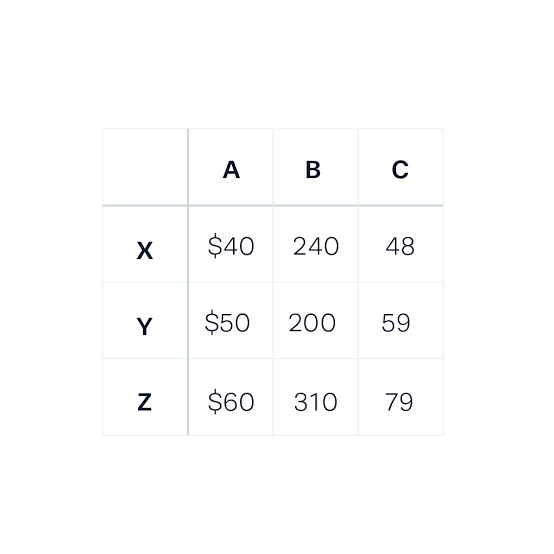

In [6]:
file = '/content/images (19).png'
image = Image.open(file).convert("RGB")
image

In [7]:
from huggingface_hub import hf_hub_download
from PIL import Image

In [8]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:

def cell_detection(file_path):

    image = Image.open(file_path).convert("RGB")
    width, height = image.size
    image.resize((int(width*0.5), int(height*0.5)))


    encoding = feature_extractor(image, return_tensors="pt")
    encoding.keys()

    with torch.no_grad():
      outputs = model(**encoding)


    target_sizes = [image.size[::-1]]
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]
    plot_results(image, results['scores'], results['labels'], results['boxes'])
    model.config.id2label

In [10]:
ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024

print(f"ram usage : {ram_usage}")

ram usage : 1210.65234375


In [11]:
def plot_results_specific(pil_img, scores, labels, boxes,lab):
    plt.figure(figsize=(16, 10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax), c in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        if label == lab:
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                       fill=False, color=c, linewidth=3))
            text = f'{model.config.id2label[label]}: {score:0.2f}'
            ax.text(xmin, ymin, text, fontsize=15,
                    bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [12]:
def draw_box_specific(image_path,labelnum):
    image = Image.open(image_path).convert("RGB")
    width, height = image.size

    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    plot_results_specific(image, results['scores'], results['labels'], results['boxes'],labelnum)

In [13]:
def compute_boxes(image_path):
    image = Image.open(image_path).convert("RGB")
    width, height = image.size

    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    boxes = results['boxes'].tolist()
    labels = results['labels'].tolist()

    return boxes,labels

In [14]:
def extract_table(image_path):
    image = Image.open(image_path).convert("RGB")
    boxes,labels = compute_boxes(image_path)

    cell_locations = []

    for box_row, label_row in zip(boxes, labels):
        if label_row == 2:
            for box_col, label_col in zip(boxes, labels):
                if label_col == 1:
                    cell_box = (box_col[0], box_row[1], box_col[2], box_row[3])
                    cell_locations.append(cell_box)

    cell_locations.sort(key=lambda x: (x[1], x[0]))

    num_columns = 0
    box_old = cell_locations[0]

    for box in cell_locations[1:]:
        x1, y1, x2, y2 = box
        x1_old, y1_old, x2_old, y2_old = box_old
        num_columns += 1
        if y1 > y1_old:
            break

        box_old = box

    headers = []
    for box in cell_locations[:num_columns]:
        x1, y1, x2, y2 = box
        cell_image = image.crop((x1, y1, x2, y2))
        new_width = cell_image.width * 4
        new_height = cell_image.height * 4
        cell_image = cell_image.resize((new_width, new_height), resample=Image.LANCZOS)
        cell_text = pytesseract.image_to_string(cell_image)
        headers.append(cell_text.rstrip())

    df = pd.DataFrame(columns=headers)

    row = []
    for box in cell_locations[num_columns:]:
        x1, y1, x2, y2 = box
        cell_image = image.crop((x1, y1, x2, y2))
        new_width = cell_image.width * 4
        new_height = cell_image.height * 4
        cell_image = cell_image.resize((new_width, new_height), resample=Image.LANCZOS)
        cell_text = pytesseract.image_to_string(cell_image)

        if len(cell_text) > num_columns:
            cell_text = cell_text[:num_columns]

        row.append(cell_text.rstrip())

        if len(row) == num_columns:
            df.loc[len(df)] = row
            row = []

    return df

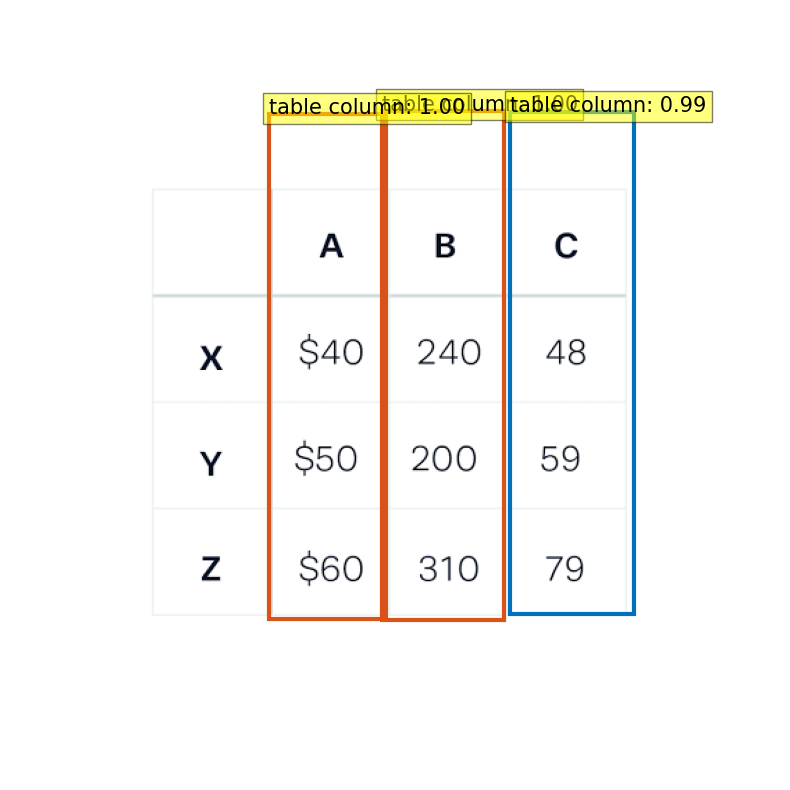

In [19]:
image_path = '/content/images (19).png'
draw_box_specific(image_path,1)
df = extract_table(image_path)
df.to_csv('data.csv', index=False)

In [18]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [20]:
df

,,,
0,,,
1,S40,240,48
2,OEN,NOT,rOQ
3,,—_,NS
4,S60,310,79


In [21]:
df = pd.read_csv('data.csv')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,S40,240,48
2,OEN,NOT,rOQ
3,NaN,—_,NS
4,S60,310,79


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 0').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Unnamed: 2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Unnamed: 1'].value_counts()
    for x_label, grp in df.groupby('Unnamed: 0')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Unnamed: 1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Unnamed: 2'].value_counts()
    for x_label, grp in df.groupby('Unnamed: 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Unnamed: 1')
_ = plt.ylabel('Unnamed: 2')